In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

In [ ]:
data = yf.download('GOOG', start='2010-01-01', end='2023-01-01')
data = data[['Close']]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])  # Input data
        y.append(data[i + time_step, 0])  # Target data
    return np.array(X), np.array(y)

In [ ]:
X, y = create_dataset(scaled_data, time_step=60)

In [ ]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0092
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.3311e-04
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.1185e-04
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 8.9431e-05
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.0817e-04
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.7301e-05
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.6406e-05
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.4595e-05
Epoch 9/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.5806e-05
Epoch 10/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.4463e-05


In [ ]:
predicted_stock_price = model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

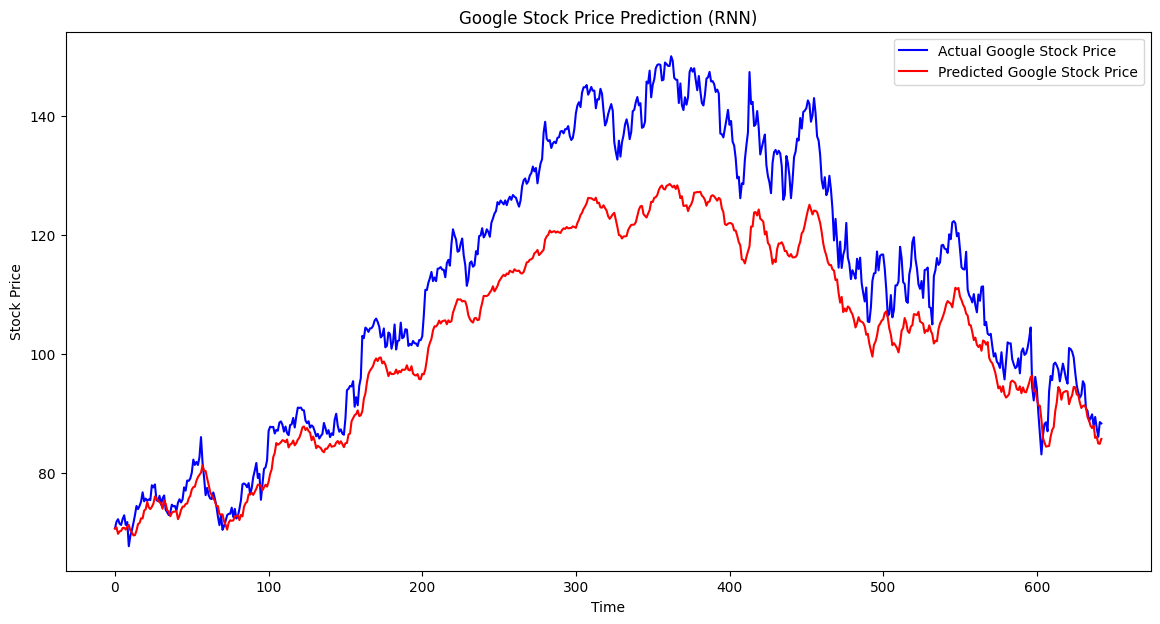

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(y_test, color='blue', label='Actual Google Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction (RNN)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()